In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets

In [30]:
colormap = {0:'black', 1:'red', 2:'blue'}
flower_colormap = {'setosa':'black','versicolor':'red','virginica':'blue'}
flower_map = {'setosa':0,'versicolor':1,'virginica':2}
def plot_region(model,dlim):
    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()
    
    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
    i=2
    
    y_array = model.predict(d12_array)
    y_array = np.array([flower_map[xx] for xx in lb.inverse_transform(y_array)])
    y_grid = y_array.reshape(d1_grid.shape)
    plt.contourf(d1_grid, d2_grid, y_grid, cmap='Pastel2')

In [28]:
def plot_region_scatter(model):

    plt.figure(figsize=(8,7))

    # Data with a scatter plot
    s = plt.scatter(x=X[:,0], y=X[:,1], c=[flower_colormap[yy] for yy in y])
    a = plt.axis()
    s.set_zorder(2)

    # plot the two regions
    plot_region(model,a)

    plt.xlabel(x0,fontsize=20)
    plt.ylabel(x1,fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [4]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = data.target_names[data.target]


iris.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)

x0 = 'petal_length'
x1 = 'petal_width'
iris.rename(columns={'petal length (cm)':x0,'petal width (cm)':x1},inplace=True)
iris

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


# extract input and output columns

In [5]:
X = iris[[x0,x1]].to_numpy()
y = iris['species'].to_numpy()

In [6]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

# encode class values as integers

In [7]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_ohe = lb.fit_transform(y)

In [34]:
y_ohe[:10,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [35]:
lb.inverse_transform(y_ohe[:10,:])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

## Define The Neural Network Model

4 inputs -> [8 hidden nodes] -> 3 outputs

In [ ]:
model = Sequential([
    Dense(5, input_dim=2, activation='relu'),
    Dense(3, activation="softmax") ])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, y_ohe, epochs=500)

In [14]:
model = Sequential([
    Dense(5, input_dim=2, activation='relu'),
    Dense(3, activation="softmax") ])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, y_ohe, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 1.2850 - accuracy: 0.3216
Epoch 2/500
5/5 [==============================] - 0s 695us/step - loss: 1.2105 - accuracy: 0.3572
Epoch 3/500
5/5 [==============================] - 0s 715us/step - loss: 1.1861 - accuracy: 0.3329
Epoch 4/500
5/5 [==============================] - 0s 913us/step - loss: 1.1571 - accuracy: 0.3359
Epoch 5/500
5/5 [==============================] - 0s 691us/step - loss: 1.1394 - accuracy: 0.3251
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 1.1126 - accuracy: 0.3726
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 1.1042 - accuracy: 0.2513
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 1.0836 - accuracy: 0.3273
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 1.0639 - accuracy: 0.3650
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 1.0567 - accuracy: 0.3342
Epoch 11/500
5/5 [===

5/5 [==============================] - 0s 957us/step - loss: 0.8151 - accuracy: 0.6131
Epoch 85/500
5/5 [==============================] - 0s 878us/step - loss: 0.8033 - accuracy: 0.6221
Epoch 86/500
5/5 [==============================] - 0s 948us/step - loss: 0.7852 - accuracy: 0.6534
Epoch 87/500
5/5 [==============================] - 0s 960us/step - loss: 0.7625 - accuracy: 0.6655
Epoch 88/500
5/5 [==============================] - 0s 994us/step - loss: 0.7828 - accuracy: 0.6662
Epoch 89/500
5/5 [==============================] - 0s 975us/step - loss: 0.7874 - accuracy: 0.6632
Epoch 90/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7673 - accuracy: 0.6584
Epoch 91/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7663 - accuracy: 0.6975
Epoch 92/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7524 - accuracy: 0.6335
Epoch 93/500
5/5 [==============================] - 0s 974us/step - loss: 0.7585 - accuracy: 0.7337
Epoch 94/500
5/5 [=

5/5 [==============================] - 0s 956us/step - loss: 0.5495 - accuracy: 0.8474
Epoch 167/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.8413
Epoch 168/500
5/5 [==============================] - 0s 881us/step - loss: 0.5527 - accuracy: 0.8699
Epoch 169/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.8705
Epoch 170/500
5/5 [==============================] - 0s 977us/step - loss: 0.5444 - accuracy: 0.8514
Epoch 171/500
5/5 [==============================] - 0s 895us/step - loss: 0.5434 - accuracy: 0.8740
Epoch 172/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.8766
Epoch 173/500
5/5 [==============================] - 0s 920us/step - loss: 0.5500 - accuracy: 0.8413
Epoch 174/500
5/5 [==============================] - 0s 999us/step - loss: 0.5293 - accuracy: 0.8618
Epoch 175/500
5/5 [==============================] - 0s 910us/step - loss: 0.5235 - accuracy: 0.8686
Epoch 176/

5/5 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.9224
Epoch 249/500
5/5 [==============================] - 0s 870us/step - loss: 0.3951 - accuracy: 0.9214
Epoch 250/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.9484
Epoch 251/500
5/5 [==============================] - 0s 944us/step - loss: 0.3679 - accuracy: 0.9497
Epoch 252/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.9479
Epoch 253/500
5/5 [==============================] - 0s 867us/step - loss: 0.3839 - accuracy: 0.9057
Epoch 254/500
5/5 [==============================] - 0s 946us/step - loss: 0.3898 - accuracy: 0.9358
Epoch 255/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.9310
Epoch 256/500
5/5 [==============================] - 0s 990us/step - loss: 0.3597 - accuracy: 0.8984
Epoch 257/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.9414
Epoch 258/500


5/5 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.9397
Epoch 331/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.9362
Epoch 332/500
5/5 [==============================] - 0s 952us/step - loss: 0.2902 - accuracy: 0.9555
Epoch 333/500
5/5 [==============================] - 0s 972us/step - loss: 0.2837 - accuracy: 0.9471
Epoch 334/500
5/5 [==============================] - 0s 959us/step - loss: 0.2859 - accuracy: 0.9606
Epoch 335/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9380
Epoch 336/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.9449
Epoch 337/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.9592
Epoch 338/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.9327
Epoch 339/500
5/5 [==============================] - 0s 904us/step - loss: 0.2854 - accuracy: 0.9267
Epoch 340/500
5/

5/5 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.9572
Epoch 413/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9680
Epoch 414/500
5/5 [==============================] - 0s 849us/step - loss: 0.2376 - accuracy: 0.9502
Epoch 415/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9680
Epoch 416/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9611
Epoch 417/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9576
Epoch 418/500
5/5 [==============================] - 0s 924us/step - loss: 0.2207 - accuracy: 0.9632
Epoch 419/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9459
Epoch 420/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.9694
Epoch 421/500
5/5 [==============================] - 0s 1ms/step - loss: 0.2158 - accuracy: 0.9681
Epoch 422/500
5/5 [=

5/5 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9477
Epoch 494/500
5/5 [==============================] - 0s 960us/step - loss: 0.1744 - accuracy: 0.9759
Epoch 495/500
5/5 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9667
Epoch 496/500
5/5 [==============================] - 0s 957us/step - loss: 0.1722 - accuracy: 0.9806
Epoch 497/500
5/5 [==============================] - 0s 1ms/step - loss: 0.1807 - accuracy: 0.9733
Epoch 498/500
5/5 [==============================] - 0s 901us/step - loss: 0.1743 - accuracy: 0.9615
Epoch 499/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9680
Epoch 500/500
5/5 [==============================] - 0s 951us/step - loss: 0.1854 - accuracy: 0.9633


Text(0, 0.5, 'accuracy')

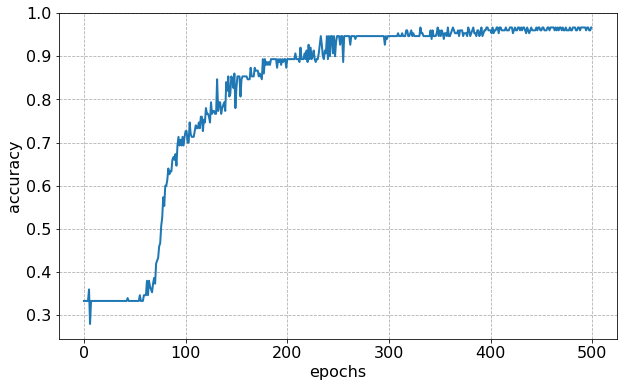

In [15]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], linewidth=2)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('epochs',fontsize=16)
plt.ylabel('accuracy',fontsize=16)

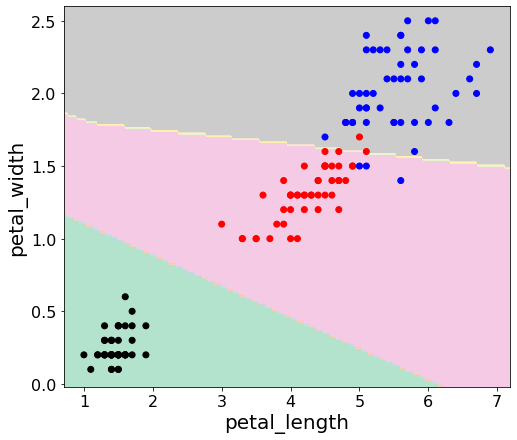

In [31]:
plot_region_scatter(model)